# Not Just Another Genre Predictor - Supervised and Unsupervised Learning Algorithms for Genre Classification

**<span style="color:CornflowerBlue">by Samantha Garcia, Brainstation Data Science Student (May - August 2022) </span>**

## Notebook 1: Loading, Cleaning and EDA

1. Introduction<br>
    1.1 [Background](#1.1)<br>
    1.2 [Business and Machine Learning Questions](#1.2)<br>
    1.3 [Project Limitations](#1.3)<br>
    1.4 [Future Developments](#1.4)<br>
    1.5 [Modeling Expectations](#1.5)<br>
    
    
2. First Pass Data EDA, Preprocessing and Modeling - A Discussion<br>
    [2.1 First Pass Dataset and Results](#2.1)<br>
    [2.2 Diversifying Genres - New Dataset Exploration](#2.2)<br>


3. Go-Forward Dataset<br>
    3.1 [Data Source](#3.1)<br>
    3.2 [Data Dictionary](#3.2)<br>
    3.3 [Spotify Audio Features](#3.3)<br>


4. Data Loading and Initial investigation<br>
    [4.1 Import - joining SQL tables](#4.1)<br>
    [4.2 Investigation and Cleaning](#4.2)<br> 
    [4.3 EDA - Feature Distributions](#4.3)<br>
    [4.4 Feature Distributions across Genres - Further Cleaning](#4.4)<br>  
    

5. [Export CSV files](#5)<br>

---
        

## 1. Introduction

### 1.1 Background  <a id="1.1"></a>

During the past 5 years, we have seen for the first time, the commoditisation of music as an asset class. Several music investment funds have materialised, even listed on the stock exchange for public trading, exploiting and trading music copyright (as well as, sometimes, the underlying master), in the same way any physical commodity such as gold or oil.

Note that we are primarily focused here on the copyright (which generates music royalties), within the world of muic publishing, as opposed to the Master which is within the realm of the Record Label. More info on that here: https://www.roundhillmusicroyaltyfund.com/resources/music-royalties-explained

#### The two major players in the space are Roundhill Fund Ltd and Hipgnosis Songs Fund Ltd:

https://www.roundhillmusicroyaltyfund.com/resources/music-publishing-market-overview

https://www.hipgnosissongs.com/

Value by genre and vintage is one of the KPIs measured by these investment funds to help shareholders understand the Fund's portfolio mix and value composition. Music consumption (popularity) is one of the key measurement points for understanding a song's value.

https://www.hipgnosissongs.com/case-studies/

Music copyright is a complicated and niche asset class that comes along with a wealth of (very private) data relating to the song's attributes, fanbase, consumption, royalty and ownership metrics, historical revenues and past exploitation. Very little public data is available and is mostly limited to data held on streaming services. Developing useful tools for analysing music as an asset class is therefore still in the hands of the copyright owning companies themselves (music publishers and investment funds).

Song copyrights are acquired by a Fund/Publisher primarily as a collection of songs written by a particular songwriter. These bundles of songs are packaged as a 'Catalogue', and the catalogue is usually sold as a whole collection of songs by a songwriter to a Fund, where the song then individually becomes part of the Fund's portfolio of songs.

Up until this point the song, although separately identifiable as a song, is wrapped up in value within the catalogue - the song's value is tied into that of the Catalogue, and the catalogue is defined by its over-arching genre, geographical popularity, writer's known style, etc.

But investment funds are primarily interested in understanding how the underlying asset fits into it's overall portfolio management. Often, 80% of the value of a catalogue comprising 200+ songs can come from the top 10 or so songs in that catalogue. This means 2 things:

1. The top songs in a catalogue hold identifiable value that needs to be maintained and maximised to return additional value to the acquirer and its shareholders

2. There is a tail of songs with little identifiable value that can be better monetised to create additional value for the acquirer and its shareholders

Once the song, as part of a songwriter's catalogue, lands within its new home, it becomes an individual song that is part of an overall portfolio of assets to be managed effectively to maximise value.

Understanding the asset's attributes and how those attributes impact consumption or usage is key for any investment manager looking to maximise value.

Popularity/ consumption is driven by key themes such as:

- listener demographic
- geography
- song visibility (major services playlisting, film, tv, social media, ads)

Knowing and understanding a song's attributes is key to effectively manage a song's value by placing it in the appropriate channels to maximise exposure to drive audience consumption.

**Exposure to new and existing markets is key - understanding how genre and other attributes drive popularity and consumption -  and therefore value - is key to any song manager. In addition, prudent portfolio management requires a diverse portfolio, such as across genres and vintages of songs.**

A | B
- | - 
<img src="../images/hip_portfolio_genre.png" width="400" height="400"> | <img src="../images/hip_portfolio_vintage.png" width="400" height="400">



Taken from pages 8 and 9 of the 2021 Hipgnosis Songs Fund Annual Report: https://www.hipgnosissongs.com/wp-content/uploads/2021/07/HSFL-AR21-web.pdf



Vintage, as well as genre, is directly relevant to a Fund's portfolio management and income profile. More on that later - if time permits, we will obtain song release dates from Spotify and model vintage against consumption, thinking about how that can be combined with our genre modeling.


### 1.2 Business and Machine Learning Questions <a id="1.2"></a>

#### Business Question

>Can we predict a song's popularity (and therefore value) based on its attributes

This is a limited measurement without access to more granular information such as geographical consumption metrics, social media penetration, etc.

We will work on a starter model focusing initially on song attribute clustering and genre analysis with a view to further development in the future to layer on value metrics, given access to the more granular information mentioned above and below.

**Creating a tool that can classify any given song into a genre or attribute-based cluster is a good first step in this direction. Which leads us to the Machine Learning Question:**

#### Machine Learning Question

>Can we derive song FEATURE PROFILES (by inspecting the song's audio attributes derived by Spotify) and ascribe VALUE to individual song features or FEATURE PROFILES

Often, songs are given a genre subjectively by music managers' opinion or songs carry genres from the Artists' genre identity, Developing an in-house model for categorising genre based on attributes, then layering on a popularity or value measure, can be of value particularly when tailored for use alongside private data held by the song copyright owners.

**We will implement 2 learning algorithms as follows:**

1. a supervised learning model where we tell the algorithm what genres the songs belong to, based on subjective 'human' genre labels - the aim here is to build a tool whereby any user can upload a song and be told what genre the song belongs to


2. an unsupervised learning model where we ask the algorithm to cluster songs based on their attributes, without seeing the songs' existing genre labels - the aim here is to ignore conventional genre labels and create a tool where songs are grouped based on machine-derived feature profiles and are given VALUE IMPORTANCE based on clearly identifiable clusters

**A secondary goal from implementing the two models will be:**

3. can we define the song clusters in a way that is understandable to the average human music listener? we could cross reference the cluster outputs from the unsupervised algorithm against the genre classes from the supervised learning algorithm to deteremine whether any of the genres are 'natural' genres or not


### 1.3 Project Limitations <a id="1.3"></a>

We appreciate that this project has some limitations which we will address here, and aim to improve upon in future iterations:

- limited access to non-musical features of songs: some of this data is publicly available but a large part of this type of data is largely private and accessible only by the rightsholders or labels. Some examples are:
    - income from 'Synchronisation' i.e. placement of songs in ads, tv, film
    - earnings profiles and consumption statistics by territory
    
- ideally we could predict future consumption/value by genre/cluster using time series forecasting, but access to half yearly / quarterly earnings is not publicly available

### 1.4 Future Developments <a id="1.4"></a>

Song vintage (based on release date) is an available additional feature (based on release date) that the author would like to look into as a next step alongside time series forecasting of royalty income from streaming, performance, synchronisation and physical sales.

Analysing songs' lyrics alongside audio attributes could be an interesting extension.

There is huge opportunity to develop this model further given access to basic data held privately by copyright owners, utlising datapoints mentioned above.

### 1.5 Modeling Expectations  <a id="1.5"></a>

For the supervised learning algorithm we will perform hyperparamter optimisation and model selection to choose a best fit model for multiclass classification. We will build a pipeline and perform grid search, and apply scaling to transform the data within the pipeline. Grid search will implement a 5 fold cross validation as default, we will optimise for that within the pipeline also.

We will NOT use PCA as we believe the dataset has a small enough number of features - runtime may be more efficient with PCA but feature importance will be eaier to measure from our best estimators without appying PCA. If we find our models take prohibitively long to run then we will reconsider.

The models we will look at are:

- Logistic Regression (baseline)
- KNN
- SVM (multiclass)
- Random Forests

For the unsupervised learning algorithm we will look at 3 clustering methods to see which is the best fit for our dataset:

- K-Means
- DBSCAN
- Hierarchical Clustering

If we have time we will also look at how Neural Networks perform at classifying our songs.

**Expected outcomes:**

We expect that supervised learning will be challenged to correctly predict genre as there is much crossover across contemporary genres - we expect the unsupervised models to provide more interesting results and find clusters that can be interpreted as defined based on song types.

These clusters can then be combined with our metrics in future iterations of this project to:

- understand how value is created across song clusters
- help in deciding how to exploit any given song (by seeing which cluster it falls into and placing it in suitable mediums for exploitation)

... and much more.

We expect classical music, EDM and other contemporary genres to be identifiable separately as they are conceptually quite different from each other as groups.

---

## 2. First Pass Data EDA, Preprocessing and Modeling - A Discussion

### 2.1 First Pass Dataset and Results <a id="2.1"></a>

This project started with a different, smaller, dataset (which was used into the Progress Standup) as a first pass iteration - we will discuss that first pass here 1. to highlight some of the challenges that changed our initial approach amd 2. to understand some of the remaining limitations.

Initially, we found a dataset of Spotify songs and attributes on Kaggle: https://www.kaggle.com/datasets/siropo/spotify-multigenre-playlists-data, of songs separated into different csv files bases on genre, totalling 21,336 songs. This seemed at the time a diverse dataset of different genres, of a good size for machine learning (not too big but big enough). 

The dataset was cleaned, explored, preprocessed and put through 2 unsupervised clustering algorithms (KMeans and DBScan). The plan was to see what clusters the unsupervised algorithm was able to find before putting a subset of balanced class data from the same dataset through supervised learning models.

See the notebooks for this first pass here:

[9.a. Appendix Notebook First Pass Data Investigation and Cleaning](http://localhost:8888/notebooks/Documents/GitHub/capstoneproject_backup190722/notebooks/9.a.%20Appendix%20Notebook%20First%20Pass%20Data%20Investigation%20and%20Cleaning.ipynb#)<br>
[9.b. Appendix Notebook First Pass Feature Selection and Data Transformation](http://localhost:8888/notebooks/Documents/GitHub/capstoneproject_backup190722/notebooks/9.b.%20Appendix%20Notebook%20First%20Pass%20Feature%20Selection%20and%20Data%20Transformation.ipynb#)<br>
[9.c. Appendix Notebook First Pass Unsupervised Learning - Clustering](http://localhost:8888/notebooks/Documents/GitHub/capstoneproject_backup190722/notebooks/9.c.%20Appendix%20Notebook%20First%20Pass%20Unsupervised%20Learning%20-%20Clustering.ipynb#)<br>

Note that these notebooks aren't vetted to be run by the reader, please read as read-only files. PDFs are also provided in the 'data' GitHub folder.

The cleaned dataset looked like this:

<img src="../images/first_pass_dataset_genres.png" width="400" height="400">

And the result of the clustering looked like this:

<img src="../images/first_pass_clustering.png" width="800" height="800">

For a dataset of 7 genres, this was a disappointing result, getting only 2 very vague clusters from DBscan and slightly clearer but still only 2 clusters from KMeans.

Looking more closely at the genre profiles we deduced that the genres were too similar in terms of feature attributes, but also conceptually... for example it's often really difficult to separate a song between rap and hip-hop...

<img src="../images/first_pass_genre_profiles.png" width="800" height="800">

We needed to find a dataset of more diverse genres, containing others such as EDM, Country, Latin, Disco, Soul, etc

### 2.2 Diversifying Genres - New Dataset Exploration <a id="2.2"></a>

So, back to searching for a more diverse dataset but with the same Spotify attributes.

1. First, we tried to download songs of particular genres ourselves, directly from Spotify, using the Spotify API. This proved challenging, as Spotify have limited the number of songs you can download with any given search criteria, so that downloading more than 1000 songs of any genre was not possible (we were able to iterate beyond the 50 search results that are given at once, but not beyond 20 iterations of 50 songs) as the number of offsets in the code are limited by Spotify).

    See the notebook with API search code here: [9.e . Appendix Notebook - Discarded Dataset Investigation - Increase and Diversify Datapoints](http://localhost:8888/notebooks/Documents/GitHub/capstoneproject_backup190722/notebooks/9.e%20.%20Appendix%20Notebook%20-%20Discarded%20Dataset%20Investigation%20-%20Increase%20and%20Diversify%20Datapoints.ipynb)<br>
    
    In addition, although we still went ahead and download 1000 songs for a range of genres, looking into the song lists within each genre it was clear that the genres made no sense against the songs. Songs are given genres by Spotify that actually relate to the Artist's genre perception, not necessarily the song's. For example, within the Disco song list we found generally 80s music alongside genuine disco songs - a large percentage of the songs were not disco at all, rather just 80s songs by an Artist who was sometimes known for making or collaborating on Disco music. One example was a Celine Dion song 'Think Twice': https://open.spotify.com/track/5T0VoskNbpJIqm2RSPU2Xt?si=5c7c9973ebe145d9... I think we can all agree this is not a disco song!
    
    This is Spotify's own description of how it assigns genre (source:https://artists.spotify.com/en/help/article/how-genre-charts-work):

    "We define genres based on info from listener playlists (title, description, etc.) and our music curation teams. We don't use info from metadata or the playlist pitching tool in Spotify for Artists. We recognize genres constantly evolve and songs can cross different genres."
    
    These lists were clearly not reliable. The most reliable way to get genre groups of songs from Spotify is from user playlists, where users have collated songs into genre playlists - music fans are quite tribalistic when it comes to music and very particular about how songs are classified into their favourite genres.
    
    
2. Secondly we found another Kaggle dataset of songs and their attributes taken from Spotify. This dataset consisted of 1.2m songs and included track ids, album ids, artists, attributes and release dates. The release dates were an attractive datapoint within this dataset as we were keen to look at vintage as well as genre (as mentioned above). There were however no genre tags, which didn't matter too much for our clustering models but severely limited the usefulness of this dataset given our business question and wider machibne learning question.

    The plan was to perhaps look up the genres from the track or artist ids but on further investigation into how we could scrape and apply genre tags from the web based from song names, artist names, or spotify track ids, it became apparent that this was either an impossible task (especially across 1.2m songs) or just unachievable in the given timeframe. This dataset was aborted, see the notebook for loading, exploring and visualing that dataset here: [9.e . Appendix Notebook - Discarded Dataset Investigation - Increase and Diversify Datapoints](http://localhost:8888/notebooks/Documents/GitHub/capstoneproject_backup190722/notebooks/9.e%20.%20Appendix%20Notebook%20-%20Discarded%20Dataset%20Investigation%20-%20Increase%20and%20Diversify%20Datapoints.ipynb#)<br>
    
    
3. Finally, we found the dataset which this project is based on, again from Kaggle but originally taken from Spotify. See next section below...
    


## 3. Go-Forward Dataset

### 3.1 Data Source <a id="3.1"></a>

This project uses pre-sourced data by a Kaggle user from Spotify, using Spotify's track audio feature API module.


https://www.kaggle.com/datasets/maltegrosse/8-m-spotify-tracks-genre-audio-features

https://developer.spotify.com/documentation/web-api/reference/#/


The data came in the form of 9 sqlite files, as follows:

- albums
- artists
- audio_features
- genres (we found this to include 5,489 genres)
- r_albums_artists
- r_albums_tracks
- r_artist_genre (found to include over 487k artist/genre combinations, including duplicates where artists had several genres)
- r_track_artist (found to include over 11.8m rows of artist/ track combinations, including duplicates where tracks have several artists collaborating)
- tracks (found to include over 8.7m tracks, many of which had a 'not playable' tag in the last column of this table)

<img src="../images/sqlite_tables_columns.png" width="600" height="600">

The code blocks within this notebook take us through the loading, cleaning and EDA of this dataset - we have uploaded the SQL files data using the sqlite3 API, linked the relevant SQL tables based on the various ids within each table, and investigated and cleaned to end up with a dataset suitable for use within this project. 


The biggest challenge with this dataset came in whittling down the 5,489 genres into a manageable smaller group of genres (we ended up with 25 genre groups and then further grouping derived 16 that we actually put into our unsupervised clustering models and 6 which were put into our supervised learning models. These mappings were done manually (over several hours) by the author, the process is described further below within the code blocks.


### 3.2 Data Dictionary <a id="3.2"></a>

See here for Spotify's own explanation of its 'Get Track Audio Features' API node and the features returned for each track, which directly refer to the columns within this dataset:

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features


Here is the dictionary for the 22 columns in this dataset, which is standard across the 7 csv files, the Spotify audio features are described within a separate data dictionary below:

- **Artist Name:** Band/Artist name
- **Track Name:** Track/Song name
- **Popularity:** Spotify track popularity rating
- **Genres:** Artist's genres
- **Playlist:** Track's playlist of origin
- **danceability:** Spotify audio feature
- **energy:** Spotify audio feature
- **key:** Spotify audio feature
- **loudness:** Spotify audio feature
- **mode:** Spotify audio feature
- **speechiness:** Spotify audio feature
- **acousticness:** Spotify audio feature
- **instrumentalness:** Spotify audio feature
- **liveness:** Spotify audio feature
- **valence:** Spotify audio feature
- **tempo:** Spotify audio feature
- **id:** Unique track ID
- **uri:** track uri
- **track_href:** track url
- **analysis-url:** Spotify audio feature
- **duration-ms:** Song duration in mili-seconds
- **time-signature:** Spotify audio feature

---

### 3.3 Spotify Audio Features Dictionary <a id="3.3"></a>

**acousticness**

number
<float>
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

>= 0
<= 1
   

**analysis_url**
   
string
A URL to access the full audio analysis of this track. An access token is required to access this data.

**danceability**
   
number
<float>
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**duration_ms**
    
integer
The duration of the track in milliseconds.

**energy**
    
number
<float>
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**id**
    
string
The Spotify ID for the track.

**instrumentalness**
    
number
<float>
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**key**
    
integer
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

>= -1
<= 11
    
    
**liveness**
    
number
<float>
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**loudness**
    
number
<float>
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**mode**
    
integer
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**speechiness**
    
number
<float>
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**tempo**
    
number
<float>
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**time_signature**
    
integer
An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

>= 3
<= 7
   
**track_href**
   
string
A link to the Web API endpoint providing full details of the track.

**type**
   
string
The object type
   

**uri**
   
string
The Spotify URI for the track.
  
**valence**
   
number
<float>
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

>= 0
<= 1

## 4. Data Loading and Initial investigation

### 4.1 Import - joining SQL tables <a id="4.1"></a>

In [1]:
import sqlite3
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
# instantiate sqlite connector
con = sqlite3.connect('spotify.sqlite')

# code to deal with errors where foreign (non-roman e.g. scandinavian language characters, are used in song names)
# found in stack overflow
con.text_factory = lambda b: b.decode(errors = 'ignore')

cur = con.cursor()

In [3]:
# look at genres table
genres_df = pd.read_sql_query('SELECT * from genres', con)
genres_df

,id
0,detroit hip hop
1,g funk
2,gangster rap
3,hardcore hip hop
4,hip hop
...,...
5484,magyar retro dance
5485,contemporary r&b
5486,piano house
5487,musica nublensina


In [4]:
# look at tracks table
tracks_df = pd.read_sql_query('SELECT * from tracks', con)
tracks_df

,id,disc_number,duration,explicit,audio_feature_id,name,preview_url,track_number,popularity,is_playable
0,1dizvxctg9dHEyaYTFufVi,1,275893,1,1dizvxctg9dHEyaYTFufVi,Gz And Hustlas (feat. Nancy Fletcher),,12,0,NaN
1,2g8HN35AnVGIk7B8yMucww,1,252746,1,2g8HN35AnVGIk7B8yMucww,Big Poppa - 2005 Remaster,https://p.scdn.co/mp3-preview/770e023eb0318270...,13,77,NaN
2,49pnyECzcMGCKAqxfTB4JZ,3,315080,0,49pnyECzcMGCKAqxfTB4JZ,"You Were Born - Early Version Of ""One Of The T...",,6,8,1.0
3,4E5IFAXCob6QqZaJMTw5YN,1,240800,1,4E5IFAXCob6QqZaJMTw5YN,Poppin' Them Thangs,https://p.scdn.co/mp3-preview/f3b556ced9657f89...,2,70,NaN
4,1gSt2UlC7mtRtJIc5zqKWn,2,203666,0,1gSt2UlC7mtRtJIc5zqKWn,"It's Hard To Say ""I Do"", When I Don't",,2,50,NaN
...,...,...,...,...,...,...,...,...,...,...
8741667,12S1TA13KXl13sCQZgtI5y,1,198000,0,12S1TA13KXl13sCQZgtI5y,Dime (Unplugged),https://p.scdn.co/mp3-preview/338399db9ca74488...,6,12,NaN
8741668,134MLEMX0AWp5kbMMf90f8,1,191360,0,134MLEMX0AWp5kbMMf90f8,You Done Fucked Up,https://p.scdn.co/mp3-preview/3920a3e0e64de14f...,15,17,NaN
8741669,13WVJaMn0ztUCU8UFCKQFO,1,272572,0,13WVJaMn0ztUCU8UFCKQFO,Again (ASOT 770) [Future Favorite] - Andrew Ra...,https://p.scdn.co/mp3-preview/e50bbeb308c9a292...,15,5,NaN
8741670,11SfAvTgnEEYy4Ef0fyFpE,1,237200,1,11SfAvTgnEEYy4Ef0fyFpE,Sound Is Vibration,https://p.scdn.co/mp3-preview/97fd7c0fb307e3e0...,9,52,NaN


Looking at the above, there is a last column that indicates many of the tracks are 'not playable'. We took the track id for one of the above not playable tracks into Spotify and found it was indeed not playable and seemed to refer to a playlist. Also notice the exceptionally long durations for these tracks.

We will create a list of 'not playable tracks' and remove these from our dataset.

In [5]:
# create notplayabletracks_list and export to csv for future use
not_playable_tracks = tracks_df[tracks_df['is_playable'].isna()]
not_playable_tracks_list = list(not_playable_tracks['id'])

not_playable_tracks_list_df = pd.DataFrame(not_playable_tracks_list)
not_playable_tracks_list_df.to_csv('../data/not_playable_tracks_list.csv')

In [6]:
# look at artist_genre table
pd.read_sql_query('SELECT * from r_artist_genre', con)

,genre_id,artist_id
0,detroit hip hop,4tujQJicOnuZRLiBFdp3Ou
1,g funk,4tujQJicOnuZRLiBFdp3Ou
2,gangster rap,4tujQJicOnuZRLiBFdp3Ou
3,hardcore hip hop,4tujQJicOnuZRLiBFdp3Ou
4,hip hop,4tujQJicOnuZRLiBFdp3Ou
...,...,...
487381,edm,05KDKIpxshxrB9BMewaCBW
487382,edm,6nS5roXSAGhTGr34W6n7Et
487383,samurai trap,5rcAoYM8NZrlnPZES9S8KV
487384,focus beats,0XBtKvTff8E8BIhtlxjVHv


Note that there are duplicates where the same artist has many genres - this is likely where an artist is known for producing songs of various genres so all of their known genre types and subgenres from Spotify have been included here. This could be challenging to work with, how do we choose which genre to use?

Let's look at the tracks and artists.

In [7]:
# look at track_artist table
pd.read_sql_query('SELECT * from r_track_artist', con)

,track_id,artist_id
0,2jKoVlU7VAmExKJ1Jh3w9P,4tujQJicOnuZRLiBFdp3Ou
1,2jKoVlU7VAmExKJ1Jh3w9P,2VX0o9LDIVmKIgpnwdJpOJ
2,2jKoVlU7VAmExKJ1Jh3w9P,3iBOsmwGzRKyR0vs2I61xP
3,2jKoVlU7VAmExKJ1Jh3w9P,22qf8cJRzBjIWb2Jc4JeOr
4,4JYUDRtPZuVNi7FAnbHyux,4akj4uteQQrrGxhX9Rjuyf
...,...,...
11840397,6ClotRUApTN25L3OnkzQjb,3y9hQYlwNKqhdybIJTFzTr
11840398,7mZL8mtlavFzAzIlIfOMv2,5e8vdggiGg9glSpuBgcaiv
11840399,7mZL8mtlavFzAzIlIfOMv2,6NgwMiz1Dwsktnn8p8yujE
11840400,08ITn8qaxbnEyk3N08IC47,4NEA8zkFgdVHYWZXANEHA7


Again, there are many duplicates where one song has many artists collaborating on that song. If one song can have many artists and each of those artists can have many genres, this could lead to excessive application of genres for each song...

In [8]:
# look at audio features table
pd.read_sql_query('SELECT * from audio_features', con)

,id,acousticness,analysis_url,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2jKoVlU7VAmExKJ1Jh3w9P,0.1800,https://api.spotify.com/v1/audio-analysis/2jKo...,0.893,219160,0.514,0.000000,11,0.0596,-5.080,1,0.2830,95.848000,4,0.787
1,4JYUDRtPZuVNi7FAnbHyux,0.2720,https://api.spotify.com/v1/audio-analysis/4JYU...,0.520,302013,0.847,0.000000,9,0.3250,-5.300,1,0.4270,177.371002,4,0.799
2,6YjKAkDYmlasMqYw73iB0w,0.0783,https://api.spotify.com/v1/audio-analysis/6YjK...,0.918,288200,0.586,0.000000,1,0.1450,-2.890,1,0.1330,95.516998,4,0.779
3,2YlvHjDb4Tyxl4A1IcDhAe,0.5840,https://api.spotify.com/v1/audio-analysis/2Ylv...,0.877,243013,0.681,0.000000,1,0.1190,-6.277,0,0.2590,94.834999,4,0.839
4,3UOuBNEin5peSRqdzvlnWM,0.1700,https://api.spotify.com/v1/audio-analysis/3UOu...,0.814,270667,0.781,0.000518,11,0.0520,-3.330,1,0.2330,93.445000,4,0.536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740038,7xq5qTqdCvTQJomW9I5pSZ,0.1430,https://api.spotify.com/v1/audio-analysis/7xq5...,0.649,184000,0.437,0.726000,2,0.1210,-12.310,1,0.0729,149.998001,4,0.164
8740039,6ClotRUApTN25L3OnkzQjb,0.0417,https://api.spotify.com/v1/audio-analysis/6Clo...,0.739,237582,0.702,0.795000,4,0.3640,-7.966,1,0.1310,94.977997,4,0.554
8740040,7mZL8mtlavFzAzIlIfOMv2,0.2570,https://api.spotify.com/v1/audio-analysis/7mZL...,0.814,170329,0.626,0.377000,7,0.1240,-7.212,0,0.3320,92.954002,4,0.617
8740041,08ITn8qaxbnEyk3N08IC47,0.0361,https://api.spotify.com/v1/audio-analysis/08IT...,0.644,199300,0.610,0.935000,0,0.1090,-5.380,1,0.0462,94.015999,4,0.438


Looking at the above, we will start with the audio features table and bring in the following columns:
1. the artist_id, by joining on id in the `audio_features` table to the track_id from the `r_track_artist` table
2. the genre_id, by joining on artist_id to artist_id from the `r_artist_genre` table

We'll then have a large dataframe with all of the audio features and genres. We will drop the artist_id column once we have brought in the genres.

In [9]:
# bring in the artist_id column from r_track_artist table
# by doing a left join on id column in audio_features table
tracks_artists_df = pd.read_sql_query('SELECT * from audio_features LEFT JOIN r_track_artist \
                    ON r_track_artist.track_id = audio_features.id', con)

In [10]:
# bring in the artist_id column from r_track_artist table
# by doing a left join on id column in audio_features table
artist_genres_df = pd.read_sql_query('SELECT * from r_artist_genre', con)

In [11]:
# reminder of artist_genre id headers for linking
artist_genres_df

,genre_id,artist_id
0,detroit hip hop,4tujQJicOnuZRLiBFdp3Ou
1,g funk,4tujQJicOnuZRLiBFdp3Ou
2,gangster rap,4tujQJicOnuZRLiBFdp3Ou
3,hardcore hip hop,4tujQJicOnuZRLiBFdp3Ou
4,hip hop,4tujQJicOnuZRLiBFdp3Ou
...,...,...
487381,edm,05KDKIpxshxrB9BMewaCBW
487382,edm,6nS5roXSAGhTGr34W6n7Et
487383,samurai trap,5rcAoYM8NZrlnPZES9S8KV
487384,focus beats,0XBtKvTff8E8BIhtlxjVHv


In [12]:
# join tracks_artist and artist_genres tables
tracks_genres_df = pd.merge(tracks_artists_df, artist_genres_df, on='artist_id', how='inner')
tracks_genres_df

,id,acousticness,analysis_url,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_id,artist_id,genre_id
0,2jKoVlU7VAmExKJ1Jh3w9P,0.180000,https://api.spotify.com/v1/audio-analysis/2jKo...,0.893,219160,0.514,0.000,11,0.0596,-5.080,1,0.2830,95.848000,4,0.7870,2jKoVlU7VAmExKJ1Jh3w9P,2VX0o9LDIVmKIgpnwdJpOJ,gangster rap
1,2jKoVlU7VAmExKJ1Jh3w9P,0.180000,https://api.spotify.com/v1/audio-analysis/2jKo...,0.893,219160,0.514,0.000,11,0.0596,-5.080,1,0.2830,95.848000,4,0.7870,2jKoVlU7VAmExKJ1Jh3w9P,2VX0o9LDIVmKIgpnwdJpOJ,hardcore hip hop
2,2jKoVlU7VAmExKJ1Jh3w9P,0.180000,https://api.spotify.com/v1/audio-analysis/2jKo...,0.893,219160,0.514,0.000,11,0.0596,-5.080,1,0.2830,95.848000,4,0.7870,2jKoVlU7VAmExKJ1Jh3w9P,2VX0o9LDIVmKIgpnwdJpOJ,hip hop
3,2jKoVlU7VAmExKJ1Jh3w9P,0.180000,https://api.spotify.com/v1/audio-analysis/2jKo...,0.893,219160,0.514,0.000,11,0.0596,-5.080,1,0.2830,95.848000,4,0.7870,2jKoVlU7VAmExKJ1Jh3w9P,2VX0o9LDIVmKIgpnwdJpOJ,hip pop
4,2jKoVlU7VAmExKJ1Jh3w9P,0.180000,https://api.spotify.com/v1/audio-analysis/2jKo...,0.893,219160,0.514,0.000,11,0.0596,-5.080,1,0.2830,95.848000,4,0.7870,2jKoVlU7VAmExKJ1Jh3w9P,2VX0o9LDIVmKIgpnwdJpOJ,rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21676213,6Q42I6v0BiF8pzg9ELOX2m,0.056700,https://api.spotify.com/v1/audio-analysis/6Q42...,0.698,289290,0.749,0.413,5,0.1250,-7.300,0,0.0535,116.991997,4,0.2770,6Q42I6v0BiF8pzg9ELOX2m,5yUWxOhPOP18jZ2TwQxEtw,south african deep house
21676214,33tYADyL2aZctrvR59K1bQ,0.077300,https://api.spotify.com/v1/audio-analysis/33tY...,0.702,200551,0.912,0.309,9,0.0926,-8.687,0,0.0652,128.018005,4,0.9570,33tYADyL2aZctrvR59K1bQ,2YEnrpAWWaNRFumgde1lLH,disco house
21676215,73xL8Khrwd3OWJlBjKSpGk,0.002080,https://api.spotify.com/v1/audio-analysis/73xL...,0.661,345000,0.951,0.804,11,0.2080,-6.984,0,0.0552,128.033997,4,0.6290,73xL8Khrwd3OWJlBjKSpGk,2YEnrpAWWaNRFumgde1lLH,disco house
21676216,6oq0MdzLaFShOXXqs2yavp,0.000448,https://api.spotify.com/v1/audio-analysis/6oq0...,0.773,330239,0.772,0.916,5,0.0982,-10.491,0,0.0616,128.977005,4,0.5310,6oq0MdzLaFShOXXqs2yavp,2YEnrpAWWaNRFumgde1lLH,disco house


In [13]:
# look at shape of joined dataframe
tracks_genres_df.shape

(21676218, 18)

As suspected and discussed above, there is excessive application of genres for each song, based on having many different artists for each song and many genres per artist. We will look at how to overcome this challenge below.

### 4.2 Investigation and Cleaning <a id="4.2"></a>

First let's go ahead and delete the not playable 'tracks' (playlists) identified above:

In [14]:
# delete not playable rows, on investigation it seems many of these are playlists, not tracks
tracks_genres_df = tracks_genres_df[~tracks_genres_df['id'].isin(not_playable_tracks_list)]
tracks_genres_df

,id,acousticness,analysis_url,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_id,artist_id,genre_id
609,5CMN9BOEdo8EWoEnMuxvfs,0.53100,https://api.spotify.com/v1/audio-analysis/5CMN...,0.620,202398,0.760,0.000000,2,0.1340,-8.705,1,0.6780,181.681000,4,0.720,5CMN9BOEdo8EWoEnMuxvfs,2VX0o9LDIVmKIgpnwdJpOJ,gangster rap
610,5CMN9BOEdo8EWoEnMuxvfs,0.53100,https://api.spotify.com/v1/audio-analysis/5CMN...,0.620,202398,0.760,0.000000,2,0.1340,-8.705,1,0.6780,181.681000,4,0.720,5CMN9BOEdo8EWoEnMuxvfs,2VX0o9LDIVmKIgpnwdJpOJ,hardcore hip hop
611,5CMN9BOEdo8EWoEnMuxvfs,0.53100,https://api.spotify.com/v1/audio-analysis/5CMN...,0.620,202398,0.760,0.000000,2,0.1340,-8.705,1,0.6780,181.681000,4,0.720,5CMN9BOEdo8EWoEnMuxvfs,2VX0o9LDIVmKIgpnwdJpOJ,hip hop
612,5CMN9BOEdo8EWoEnMuxvfs,0.53100,https://api.spotify.com/v1/audio-analysis/5CMN...,0.620,202398,0.760,0.000000,2,0.1340,-8.705,1,0.6780,181.681000,4,0.720,5CMN9BOEdo8EWoEnMuxvfs,2VX0o9LDIVmKIgpnwdJpOJ,hip pop
613,5CMN9BOEdo8EWoEnMuxvfs,0.53100,https://api.spotify.com/v1/audio-analysis/5CMN...,0.620,202398,0.760,0.000000,2,0.1340,-8.705,1,0.6780,181.681000,4,0.720,5CMN9BOEdo8EWoEnMuxvfs,2VX0o9LDIVmKIgpnwdJpOJ,rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21676101,4U3qYyiGTa9xp41yIDnB4L,0.10100,https://api.spotify.com/v1/audio-analysis/4U3q...,0.568,204000,0.841,0.000000,6,0.0709,-3.831,0,0.3050,80.043999,4,0.667,4U3qYyiGTa9xp41yIDnB4L,7HooMDZWSlS5FmEzJKrHix,swedish trap pop
21676102,7eyKincxvCFTpzkE5KjztP,0.03830,https://api.spotify.com/v1/audio-analysis/7eyK...,0.805,159429,0.874,0.000722,2,0.0407,-2.535,1,0.0651,139.998001,4,0.931,7eyKincxvCFTpzkE5KjztP,5Aixh4wA2Q2e2fjVsNl4FC,romanian pop
21676103,4Eu4htf1YgVIhr4lAedAIN,0.01290,https://api.spotify.com/v1/audio-analysis/4Eu4...,0.549,207160,0.782,0.000011,1,0.1110,-4.781,1,0.0750,181.998001,4,0.911,4Eu4htf1YgVIhr4lAedAIN,6qVFWwbNA5OPHpVpkrDqfY,vapor soul
21676109,1m0TTmLj4sxkflZMYYLBI3,0.80800,https://api.spotify.com/v1/audio-analysis/1m0T...,0.867,200240,0.425,0.581000,9,0.0981,-9.665,0,0.0637,102.057999,4,0.748,1m0TTmLj4sxkflZMYYLBI3,2fiBm8K081IGRJmggdUL3Y,balkan beats


In [15]:
# export joined SQL lite dataframe to csv before genre mappings are applied
tracks_genres_df.to_csv('../data/SQL_tracks_genres_unmapped.csv')

In [16]:
# export genres table to work on genre group mappings in excel
genres_df.to_csv('../data/SQLitegenres.csv')

#### Genre Mappings

We have manually mapped the 5,489 genres in the genres sqlite table in excel and will reimport here to use as a mapping file.

As mentioned above, we have whittled down the 5,489 genres into a manageable smaller group of genre, ending up with 25 genre groups which were further grouped into 16 genre groups that we actually put into our unsupervised clustering models and 6 which were put into our supervised learning models.

We have removed any worldwide national variations as there could be local musical/folk themes and variations projected onto the music that may make it differ from other regional varieties. To simplify the classes and come up with classes containing datapoints that are as similar as possible, the author has decided to remove all regional varities except american and uk regions (as the author is very familiar with music from those regions and understands the nature of music from those regions). However, Scottish, Irish and Welsh variants have been removed in case of any local/ folk variants.

In [19]:
# import checkpoint file to avoid re-reunning all steps above if need to re-run notebook
tracks_genres_df = pd.read_csv('../data/SQL_tracks_genres_unmapped.csv', index_col=0)

In [20]:
# import genre mapping table
genres_mapping = pd.read_csv('../data/second_pass_genres_mapping.csv', index_col=0)
genres_mapping

,genre_id,genre_group
0,detroit hip hop,rap/hiphop
1,g funk,funk
2,gangster rap,rap/hiphop
3,hardcore hip hop,rap/hiphop
4,hip hop,rap/hiphop
...,...,...
5484,magyar retro dance,delete
5485,contemporary r&b,rnb
5486,piano house,delete
5487,musica nublensina,delete


In [21]:
# have a look at class (genre) representation
# the 'delete' class represents groups highlighted for removal from the dataset as desribed above
genres_mapping['genre_group'].value_counts()

delete           3943
indie             210
folk              175
hardcore_rock     169
rock              159
electro           105
rap/hiphop        101
dance              66
jazz               64
trap               63
pop                56
edm                52
gospel             35
funk               34
asian pop          32
soul               28
latin              27
reggae             25
blues              24
caribbean          23
country            21
ska                21
classical          19
ballroom           17
rnb                13
disco               7
Name: genre_group, dtype: int64

In [22]:
# combine these mappings into our main dataframe with tracks and their features
tracks_genres_df = pd.merge(tracks_genres_df, genres_mapping, on='genre_id', how='inner')
tracks_genres_df.shape

(1089818, 19)

In [23]:
# look at genre_group mappings against the original genre_ids
# index was reset to ensure accurate joining of genres against original rows
tracks_genres_df

,id,acousticness,analysis_url,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_id,artist_id,genre_id,genre_group
0,5CMN9BOEdo8EWoEnMuxvfs,0.531000,https://api.spotify.com/v1/audio-analysis/5CMN...,0.620,202398,0.760,0.000000,2,0.1340,-8.705,1,0.6780,181.681000,4,0.720,5CMN9BOEdo8EWoEnMuxvfs,2VX0o9LDIVmKIgpnwdJpOJ,gangster rap,rap/hiphop
1,122VGKCzTh6G0QIu8e4lka,0.134000,https://api.spotify.com/v1/audio-analysis/122V...,0.726,226733,0.870,0.000000,6,0.2450,-2.388,1,0.3480,92.385002,4,0.930,122VGKCzTh6G0QIu8e4lka,2VX0o9LDIVmKIgpnwdJpOJ,gangster rap,rap/hiphop
2,4iAusuifPGTnYbxgdINuDE,0.117000,https://api.spotify.com/v1/audio-analysis/4iAu...,0.798,193720,0.831,0.000000,6,0.6940,-2.697,1,0.3450,89.220001,4,0.885,4iAusuifPGTnYbxgdINuDE,2VX0o9LDIVmKIgpnwdJpOJ,gangster rap,rap/hiphop
3,13SRnzFXtzu3xNlcxGUVao,0.029200,https://api.spotify.com/v1/audio-analysis/13SR...,0.892,254507,0.483,0.000004,6,0.0885,-8.289,1,0.2710,90.148003,4,0.675,13SRnzFXtzu3xNlcxGUVao,2VX0o9LDIVmKIgpnwdJpOJ,gangster rap,rap/hiphop
4,3OmiK2O1NtFXbY18CZC3r2,0.175000,https://api.spotify.com/v1/audio-analysis/3Omi...,0.767,185000,0.839,0.000010,7,0.3720,-6.491,1,0.3540,91.891998,4,0.528,3OmiK2O1NtFXbY18CZC3r2,2VX0o9LDIVmKIgpnwdJpOJ,gangster rap,rap/hiphop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089813,6n0uvtQp8EzHZKYM2Exv40,0.000182,https://api.spotify.com/v1/audio-analysis/6n0u...,0.584,277812,0.572,0.044400,8,0.2190,-10.075,0,0.0538,105.987000,4,0.290,6n0uvtQp8EzHZKYM2Exv40,4GehyOuZl0eef2JHe4NfjM,slowed and reverb,delete
1089814,7nH7navD1RWd8a06FKDbHI,0.009290,https://api.spotify.com/v1/audio-analysis/7nH7...,0.577,310282,0.662,0.000000,2,0.4190,-7.988,1,0.0532,82.403000,4,0.151,7nH7navD1RWd8a06FKDbHI,5JecmdDUam09bdClMbFgq8,slowed and reverb,delete
1089815,5rAXz4RPxC8AqhU67wrWjE,0.387000,https://api.spotify.com/v1/audio-analysis/5rAX...,0.506,411667,0.530,0.456000,5,0.3050,-10.319,0,0.0582,86.213997,4,0.613,5rAXz4RPxC8AqhU67wrWjE,44sq4drdA8zeUYeV3JlVsj,russian modern jazz,delete
1089816,4vHtyA2hUzhE3ELGWwHPIG,0.610000,https://api.spotify.com/v1/audio-analysis/4vHt...,0.720,325107,0.439,0.360000,7,0.1130,-10.786,0,0.0311,129.994003,3,0.481,4vHtyA2hUzhE3ELGWwHPIG,2EV8kIVcK0wIeKmemv8U1k,turkce kadin rap,delete


In [24]:
# drop rows highlighted for deletion by the mapping table
tracks_genres_df = tracks_genres_df[~(tracks_genres_df['genre_group']=='delete')]
tracks_genres_df

,id,acousticness,analysis_url,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_id,artist_id,genre_id,genre_group
0,5CMN9BOEdo8EWoEnMuxvfs,0.5310,https://api.spotify.com/v1/audio-analysis/5CMN...,0.620,202398,0.760,0.000000,2,0.1340,-8.705,1,0.6780,181.681000,4,0.720,5CMN9BOEdo8EWoEnMuxvfs,2VX0o9LDIVmKIgpnwdJpOJ,gangster rap,rap/hiphop
1,122VGKCzTh6G0QIu8e4lka,0.1340,https://api.spotify.com/v1/audio-analysis/122V...,0.726,226733,0.870,0.000000,6,0.2450,-2.388,1,0.3480,92.385002,4,0.930,122VGKCzTh6G0QIu8e4lka,2VX0o9LDIVmKIgpnwdJpOJ,gangster rap,rap/hiphop
2,4iAusuifPGTnYbxgdINuDE,0.1170,https://api.spotify.com/v1/audio-analysis/4iAu...,0.798,193720,0.831,0.000000,6,0.6940,-2.697,1,0.3450,89.220001,4,0.885,4iAusuifPGTnYbxgdINuDE,2VX0o9LDIVmKIgpnwdJpOJ,gangster rap,rap/hiphop
3,13SRnzFXtzu3xNlcxGUVao,0.0292,https://api.spotify.com/v1/audio-analysis/13SR...,0.892,254507,0.483,0.000004,6,0.0885,-8.289,1,0.2710,90.148003,4,0.675,13SRnzFXtzu3xNlcxGUVao,2VX0o9LDIVmKIgpnwdJpOJ,gangster rap,rap/hiphop
4,3OmiK2O1NtFXbY18CZC3r2,0.1750,https://api.spotify.com/v1/audio-analysis/3Omi...,0.767,185000,0.839,0.000010,7,0.3720,-6.491,1,0.3540,91.891998,4,0.528,3OmiK2O1NtFXbY18CZC3r2,2VX0o9LDIVmKIgpnwdJpOJ,gangster rap,rap/hiphop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089657,2fggk38cFG35W94aUrU7mg,0.0965,https://api.spotify.com/v1/audio-analysis/2fgg...,0.672,310404,0.631,0.000001,5,0.1370,-8.201,1,0.0285,107.949997,4,0.582,2fggk38cFG35W94aUrU7mg,2SdovVmFnr5G1SlQzG5Hp0,classic city pop,pop
1089658,1AwtLvFSwkMVjNyl89Pm9e,0.7300,https://api.spotify.com/v1/audio-analysis/1Awt...,0.671,368133,0.504,0.949000,5,0.1020,-11.528,0,0.0312,90.037003,4,0.883,1AwtLvFSwkMVjNyl89Pm9e,0KZ7Lk1c6rpp0nwvY9EuD4,classic city pop,pop
1089659,0VkesoUMy4jJOCPRMtj1G4,0.0837,https://api.spotify.com/v1/audio-analysis/0Vke...,0.678,289373,0.874,0.006840,0,0.2380,-4.538,1,0.0270,122.125999,4,0.482,0VkesoUMy4jJOCPRMtj1G4,0KZ7Lk1c6rpp0nwvY9EuD4,classic city pop,pop
1089731,6oTft4JlgbseUOkW2NlK3v,0.1800,https://api.spotify.com/v1/audio-analysis/6oTf...,0.880,215133,0.769,0.000025,1,0.0998,-1.833,0,0.1690,129.906998,4,0.344,6oTft4JlgbseUOkW2NlK3v,1LpMDOl6RluwqVfjhKATLA,rave funk,funk


In [25]:
# look at songs duplicated over several rows
tracks_genres_df['id'].value_counts()

6QwoKWFf7qZtEDtycV9JPW    44
1Y4MTl9OMAXJ9C9Eo70hU3    42
2dqMQDvPZPRBL7qLM3uDiw    42
1LEXvL4LYplX5F0uqMbKBq    41
0R5hNQo1F28oIviRc9Eak0    41
                          ..
1bh3zQqSf1slnKn7rlXwQg     1
6dEGHEmdFx46v5rAaPmmRn     1
2oWtgVvoICwog7V2tjKCOH     1
7ujRvmVs437DEmuXDrj1FV     1
2GjkuoED343wZ9YJm9PRoG     1
Name: id, Length: 180802, dtype: int64

Let's clean up the dataframe further, now that we have a dataset of songs that are playable and have understandable genres that we can work with.

We need all tracks to have only one genre.

Let's start by looking at the song in the list above with the most rows in the dataset:

In [26]:
tracks_genres_df[tracks_genres_df['id'] == '6QwoKWFf7qZtEDtycV9JPW']

,id,acousticness,analysis_url,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_id,artist_id,genre_id,genre_group
1677,6QwoKWFf7qZtEDtycV9JPW,0.0553,https://api.spotify.com/v1/audio-analysis/6Qwo...,0.731,308204,0.735,0.0,1,0.146,-4.9,1,0.28,139.908005,4,0.459,6QwoKWFf7qZtEDtycV9JPW,1grI9x4Uzos1Asx8JmRW6T,gangster rap,rap/hiphop
1764,6QwoKWFf7qZtEDtycV9JPW,0.0553,https://api.spotify.com/v1/audio-analysis/6Qwo...,0.731,308204,0.735,0.0,1,0.146,-4.9,1,0.28,139.908005,4,0.459,6QwoKWFf7qZtEDtycV9JPW,0st5vgzw9XkH5ALJiUM1lE,gangster rap,rap/hiphop
1826,6QwoKWFf7qZtEDtycV9JPW,0.0553,https://api.spotify.com/v1/audio-analysis/6Qwo...,0.731,308204,0.735,0.0,1,0.146,-4.9,1,0.28,139.908005,4,0.459,6QwoKWFf7qZtEDtycV9JPW,6MrdwyCIKbpXmTKQBlG3uq,gangster rap,rap/hiphop
2632,6QwoKWFf7qZtEDtycV9JPW,0.0553,https://api.spotify.com/v1/audio-analysis/6Qwo...,0.731,308204,0.735,0.0,1,0.146,-4.9,1,0.28,139.908005,4,0.459,6QwoKWFf7qZtEDtycV9JPW,4Q5sPmM8j4SpMqL4UA1DtS,gangster rap,rap/hiphop
2771,6QwoKWFf7qZtEDtycV9JPW,0.0553,https://api.spotify.com/v1/audio-analysis/6Qwo...,0.731,308204,0.735,0.0,1,0.146,-4.9,1,0.28,139.908005,4,0.459,6QwoKWFf7qZtEDtycV9JPW,0k7Xl1pqI3tu8sSEjo5oEg,gangster rap,rap/hiphop
9002,6QwoKWFf7qZtEDtycV9JPW,0.0553,https://api.spotify.com/v1/audio-analysis/6Qwo...,0.731,308204,0.735,0.0,1,0.146,-4.9,1,0.28,139.908005,4,0.459,6QwoKWFf7qZtEDtycV9JPW,0st5vgzw9XkH5ALJiUM1lE,hip hop,rap/hiphop
9931,6QwoKWFf7qZtEDtycV9JPW,0.0553,https://api.spotify.com/v1/audio-analysis/6Qwo...,0.731,308204,0.735,0.0,1,0.146,-4.9,1,0.28,139.908005,4,0.459,6QwoKWFf7qZtEDtycV9JPW,0k7Xl1pqI3tu8sSEjo5oEg,hip hop,rap/hiphop
11922,6QwoKWFf7qZtEDtycV9JPW,0.0553,https://api.spotify.com/v1/audio-analysis/6Qwo...,0.731,308204,0.735,0.0,1,0.146,-4.9,1,0.28,139.908005,4,0.459,6QwoKWFf7qZtEDtycV9JPW,7kwCkEJ384PWm0UQW3hxjS,hip hop,rap/hiphop
15096,6QwoKWFf7qZtEDtycV9JPW,0.0553,https://api.spotify.com/v1/audio-analysis/6Qwo...,0.731,308204,0.735,0.0,1,0.146,-4.9,1,0.28,139.908005,4,0.459,6QwoKWFf7qZtEDtycV9JPW,0st5vgzw9XkH5ALJiUM1lE,rap,rap/hiphop
15158,6QwoKWFf7qZtEDtycV9JPW,0.0553,https://api.spotify.com/v1/audio-analysis/6Qwo...,0.731,308204,0.735,0.0,1,0.146,-4.9,1,0.28,139.908005,4,0.459,6QwoKWFf7qZtEDtycV9JPW,6MrdwyCIKbpXmTKQBlG3uq,rap,rap/hiphop


We can see this song has several artists and each of those artists has several genres. Let's remove the artist and track ids and see how many songs we have that are similar: i.e. are repeated in rows for the same reasons:

In [27]:
tracks_genres_df.drop(['artist_id', 'genre_id'], axis=1, inplace=True)

C:\Users\smgar\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
tracks_genres_df.duplicated().value_counts()

True     284634
False    277510
dtype: int64

In [29]:
# drop rows that are duplicates
tracks_genres_df.drop_duplicates(keep='first', inplace=True)

C:\Users\smgar\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [30]:
# look at remaining rows and see how many songs are still repeated
tracks_genres_df['id'].value_counts()

5TsQ4BeiRSxNHwPIQhN199    9
4EJQc7vlpmvG7bLQmIpYVY    9
2A6RksurXhPiFxEv69xwrE    8
1PJPrsI9gGxLGj6KBp3bIV    8
0KMN7IeBS6Wi00wNLgPGwI    8
                         ..
6SFPopgBXDHpusstz3zFO8    1
5OlQj9C7Y2UqClTXtFYkAB    1
6pyTMghXHsxNiITx7eZu2u    1
3XvpjM9RUEKNEWktm7u3ie    1
2GjkuoED343wZ9YJm9PRoG    1
Name: id, Length: 180802, dtype: int64

In [31]:
# create list of repeated songs
value_counts = tracks_genres_df.id.value_counts()

In [32]:
# see how many there are
print(value_counts[value_counts > 1])

5TsQ4BeiRSxNHwPIQhN199    9
4EJQc7vlpmvG7bLQmIpYVY    9
2A6RksurXhPiFxEv69xwrE    8
1PJPrsI9gGxLGj6KBp3bIV    8
0KMN7IeBS6Wi00wNLgPGwI    8
                         ..
6omfxikAVbXHhVrGmjMfca    2
3Db0iDboSPNf6zO5BojV58    2
4Sgm1LilgqswPbusRIob9v    2
1r32nV0xpyhjZrJveFLlMm    2
4SISL9TYMj4hPrSHGwiYTw    2
Name: id, Length: 66210, dtype: int64


In [33]:
# let's test a song and see if we can allocate a genre easily
tracks_genres_df[tracks_genres_df['id'] == '5TsQ4BeiRSxNHwPIQhN199']

,id,acousticness,analysis_url,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_id,genre_group
18868,5TsQ4BeiRSxNHwPIQhN199,0.000144,https://api.spotify.com/v1/audio-analysis/5TsQ...,0.748,309720,0.752,0.0065,11,0.65,-7.413,1,0.0397,124.0,4,0.652,5TsQ4BeiRSxNHwPIQhN199,rap/hiphop
355464,5TsQ4BeiRSxNHwPIQhN199,0.000144,https://api.spotify.com/v1/audio-analysis/5TsQ...,0.748,309720,0.752,0.0065,11,0.65,-7.413,1,0.0397,124.0,4,0.652,5TsQ4BeiRSxNHwPIQhN199,edm
573575,5TsQ4BeiRSxNHwPIQhN199,0.000144,https://api.spotify.com/v1/audio-analysis/5TsQ...,0.748,309720,0.752,0.0065,11,0.65,-7.413,1,0.0397,124.0,4,0.652,5TsQ4BeiRSxNHwPIQhN199,rock
607312,5TsQ4BeiRSxNHwPIQhN199,0.000144,https://api.spotify.com/v1/audio-analysis/5TsQ...,0.748,309720,0.752,0.0065,11,0.65,-7.413,1,0.0397,124.0,4,0.652,5TsQ4BeiRSxNHwPIQhN199,pop
654744,5TsQ4BeiRSxNHwPIQhN199,0.000144,https://api.spotify.com/v1/audio-analysis/5TsQ...,0.748,309720,0.752,0.0065,11,0.65,-7.413,1,0.0397,124.0,4,0.652,5TsQ4BeiRSxNHwPIQhN199,electro
727827,5TsQ4BeiRSxNHwPIQhN199,0.000144,https://api.spotify.com/v1/audio-analysis/5TsQ...,0.748,309720,0.752,0.0065,11,0.65,-7.413,1,0.0397,124.0,4,0.652,5TsQ4BeiRSxNHwPIQhN199,dance
769177,5TsQ4BeiRSxNHwPIQhN199,0.000144,https://api.spotify.com/v1/audio-analysis/5TsQ...,0.748,309720,0.752,0.0065,11,0.65,-7.413,1,0.0397,124.0,4,0.652,5TsQ4BeiRSxNHwPIQhN199,indie
879178,5TsQ4BeiRSxNHwPIQhN199,0.000144,https://api.spotify.com/v1/audio-analysis/5TsQ...,0.748,309720,0.752,0.0065,11,0.65,-7.413,1,0.0397,124.0,4,0.652,5TsQ4BeiRSxNHwPIQhN199,trap
928110,5TsQ4BeiRSxNHwPIQhN199,0.000144,https://api.spotify.com/v1/audio-analysis/5TsQ...,0.748,309720,0.752,0.0065,11,0.65,-7.413,1,0.0397,124.0,4,0.652,5TsQ4BeiRSxNHwPIQhN199,soul


No, we can't easily allocate a genre... this song has 9 totally different genres! The artists who collaborated on this song come from very diverse backgrounds. Let's have a listen in Spotify:

In [34]:
# get track name to paste into spotify and listen
tracks_df[tracks_df['id'] == '5TsQ4BeiRSxNHwPIQhN199']

,id,disc_number,duration,explicit,audio_feature_id,name,preview_url,track_number,popularity,is_playable
7507369,5TsQ4BeiRSxNHwPIQhN199,1,309720,0,5TsQ4BeiRSxNHwPIQhN199,Parallel Lines - Yolanda Be Cool Remix,https://p.scdn.co/mp3-preview/d057b51aebb62ba8...,8,0,1.0


We have pasted the song name into Spotify to get the song link: https://open.spotify.com/track/5TsQ4BeiRSxNHwPIQhN199?si=bb2f4859ecf046ba

Listening to the track in spotify it's definitely Electro, but there is no way of knowing that without listening to all 81k tracks that have more than one genre tag. The other genre tags (which come from the artist) are super misleading.

So let's drop all songs with more than one genre tag, of the 180,802 songs left we will be dropping 66,210 songs - leaving 114,592 songs.

In [35]:
multi_genre_songs_list = list(value_counts[value_counts > 1].index)
multi_genre_songs_list

['5TsQ4BeiRSxNHwPIQhN199',
 '4EJQc7vlpmvG7bLQmIpYVY',
 '2A6RksurXhPiFxEv69xwrE',
 '1PJPrsI9gGxLGj6KBp3bIV',
 '0KMN7IeBS6Wi00wNLgPGwI',
 '4fyYXlerbJmWlFhdByrBpC',
 '5FH2dK89RFAs293DDuV31z',
 '4qwGSnksrW3OKnzXUIf8Q9',
 '11lGFozLV5jHmFFF5Yr8yP',
 '7BbZv0KkLcRMT8RGDHzAza',
 '09jd28TO3ZzD3rgqo1QXR4',
 '5uDt3cIyXjZHi8yampIWuU',
 '6YS0X2cZPeNM3bHpyEgpeA',
 '449CycnRyT3XNJCVbaFlNN',
 '0xo7OPDgx86LzMECUmYJfS',
 '5IINwAQXbWgBs6ZcC5jMuY',
 '7xX9XhM7C4Xp8OiTdlreJ5',
 '3xSMNTqBIksVuCpu5FxlBG',
 '1unNjUrP1u7W4u3BAr4nIp',
 '2NlKMDEhJFwesq3pIwdPOE',
 '642mfam1BDAdRmB2AfvhwU',
 '75zDjAPuYV6sSTK2BmJJTh',
 '5z3fldommbqFVFv85EogdT',
 '3hGD3p8zOYjkddfh6UNRwy',
 '7yqm6Pbtoly46V9NEDyJsu',
 '4tnfa4v7IJs9xSSol83r19',
 '7cHXoWtMPZXIGwTZZmxGHG',
 '6EDvELtnRM4OgWML8ATGDA',
 '2IWqNvq0XgqpqM03K3IFct',
 '2TMxAHRj20VoP1SY17JFRG',
 '400ZHtPwx8xFbcdyXx3yOk',
 '0c2BrgPwZUtnwubaxuFq26',
 '4N4ajjRgWSPsJhomiKhoyJ',
 '7dRQop25S7N2CQpCPMdwQw',
 '1KGRiZxua3BO58aRErRxyd',
 '3GNdkJswHGfl1jsBry61sG',
 '3MMGlOlLDAH04gVHZ2lfSj',
 

In [36]:
# drop songs which appear numerous times that are within the multi-genre-songs-list
tracks_genres_df = tracks_genres_df[~tracks_genres_df['id'].isin(multi_genre_songs_list)]
tracks_genres_df

,id,acousticness,analysis_url,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_id,genre_group
0,5CMN9BOEdo8EWoEnMuxvfs,0.5310,https://api.spotify.com/v1/audio-analysis/5CMN...,0.620,202398,0.760,0.000000,2,0.134,-8.705,1,0.6780,181.681000,4,0.720,5CMN9BOEdo8EWoEnMuxvfs,rap/hiphop
1,122VGKCzTh6G0QIu8e4lka,0.1340,https://api.spotify.com/v1/audio-analysis/122V...,0.726,226733,0.870,0.000000,6,0.245,-2.388,1,0.3480,92.385002,4,0.930,122VGKCzTh6G0QIu8e4lka,rap/hiphop
2,4iAusuifPGTnYbxgdINuDE,0.1170,https://api.spotify.com/v1/audio-analysis/4iAu...,0.798,193720,0.831,0.000000,6,0.694,-2.697,1,0.3450,89.220001,4,0.885,4iAusuifPGTnYbxgdINuDE,rap/hiphop
4,3OmiK2O1NtFXbY18CZC3r2,0.1750,https://api.spotify.com/v1/audio-analysis/3Omi...,0.767,185000,0.839,0.000010,7,0.372,-6.491,1,0.3540,91.891998,4,0.528,3OmiK2O1NtFXbY18CZC3r2,rap/hiphop
24,1T8Qcl9NYcbIQ4CUYfnzGO,0.5060,https://api.spotify.com/v1/audio-analysis/1T8Q...,0.738,298067,0.792,0.000000,10,0.098,-4.893,0,0.2380,167.992996,4,0.668,1T8Qcl9NYcbIQ4CUYfnzGO,rap/hiphop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089646,6daCRknsAlUE6K4sfF6gJl,0.5610,https://api.spotify.com/v1/audio-analysis/6daC...,0.763,169520,0.378,0.000000,5,0.120,-12.151,1,0.1300,129.559006,4,0.835,6daCRknsAlUE6K4sfF6gJl,folk
1089657,2fggk38cFG35W94aUrU7mg,0.0965,https://api.spotify.com/v1/audio-analysis/2fgg...,0.672,310404,0.631,0.000001,5,0.137,-8.201,1,0.0285,107.949997,4,0.582,2fggk38cFG35W94aUrU7mg,pop
1089658,1AwtLvFSwkMVjNyl89Pm9e,0.7300,https://api.spotify.com/v1/audio-analysis/1Awt...,0.671,368133,0.504,0.949000,5,0.102,-11.528,0,0.0312,90.037003,4,0.883,1AwtLvFSwkMVjNyl89Pm9e,pop
1089659,0VkesoUMy4jJOCPRMtj1G4,0.0837,https://api.spotify.com/v1/audio-analysis/0Vke...,0.678,289373,0.874,0.006840,0,0.238,-4.538,1,0.0270,122.125999,4,0.482,0VkesoUMy4jJOCPRMtj1G4,pop


In [37]:
# check that all tracks now appear only once
tracks_genres_df['id'].value_counts()

5CMN9BOEdo8EWoEnMuxvfs    1
0LziNUBobU20adNVSq9RZD    1
70KorlFwbe7V1C2CEpVzkD    1
5qJZOFGfrodIAhtvRyjwRw    1
3yEVQMhKEL4t3MuuSI6KZN    1
                         ..
25oBfHpwEXTqbeQvW8oD6t    1
0LAFAchSia8dQ5J4JdKedc    1
7aW9MCMZKEhz4tOrb379gL    1
122FchrLTqvzESNgWFFKss    1
2GjkuoED343wZ9YJm9PRoG    1
Name: id, Length: 114592, dtype: int64

In [38]:
# look at class representation and hope that there are still diverse genres after deleting so many rows of data
tracks_genres_df['genre_group'].value_counts()

classical        14350
rock             11626
jazz              7085
indie             6773
rap/hiphop        6760
folk              6698
pop               6241
hardcore_rock     5943
dance             5854
edm               5746
latin             5201
electro           4679
caribbean         4017
asian pop         3902
ballroom          3501
gospel            3305
country           3111
trap              2234
funk              2012
blues             1853
soul              1199
rnb                740
ska                658
disco              611
reggae             493
Name: genre_group, dtype: int64

In [39]:
tracks_genres_df.shape

(114592, 17)

In [40]:
# look at features headline stats
tracks_genres_df.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,114592.000000,114592.000000,1.145920e+05,114592.000000,114592.000000,114592.000000,114592.000000,114592.000000,114592.000000,114592.000000,114592.000000,114592.000000,114592.000000
mean,0.372189,0.532172,2.742030e+05,0.578537,0.269330,5.265184,0.208908,-10.229662,0.639338,0.086185,119.416856,3.880646,0.455488
std,0.373526,0.194433,1.805629e+05,0.284942,0.368249,3.549029,0.189537,6.305668,0.480195,0.098152,29.459559,0.463601,0.272772
min,0.000000,0.000000,3.056000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.014500,0.392000,1.906962e+05,0.358000,0.000002,2.000000,0.094400,-12.677000,0.000000,0.036700,96.250000,4.000000,0.219000
50%,0.219000,0.546000,2.367600e+05,0.627000,0.004630,5.000000,0.128000,-8.339000,1.000000,0.048100,120.019997,4.000000,0.439000
75%,0.756250,0.683000,3.109090e+05,0.824000,0.673000,8.000000,0.266000,-5.892000,1.000000,0.084200,136.147251,4.000000,0.680000
max,0.996000,0.996000,6.014408e+06,1.000000,1.000000,11.000000,1.000000,3.063000,1.000000,0.964000,247.992004,5.000000,1.000000


Many of the features have minimum value 0 - are these genuine values or errors that need to be considered?

Looking at the feature dictionary, many of the features could have a valid value of 0. However, tempo and time_signature are 2 that shouldn't. A song can't have 0 bpm or 0/4 beat (time_signature).

Let's filter on those:

In [41]:
# filter on rows with 0 tempo
tracks_genres_df[tracks_genres_df['tempo'] == 0]

,id,acousticness,analysis_url,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_id,genre_group
924,4jPVsbG0gLq4zCTjrNRVt7,0.334,https://api.spotify.com/v1/audio-analysis/4jPV...,0.0,4547,0.027600,0.00000,8,0.000,-18.275999,1,0.0,0.0,0,0.0,4jPVsbG0gLq4zCTjrNRVt7,rap/hiphop
981,1KZVyBuGtu75RAFG3t0t39,0.965,https://api.spotify.com/v1/audio-analysis/1KZV...,0.0,5307,0.774000,0.00000,7,0.000,-6.861000,1,0.0,0.0,0,0.0,1KZVyBuGtu75RAFG3t0t39,rap/hiphop
10099,74YkWS1JOOLlSdoabMUdv8,0.145,https://api.spotify.com/v1/audio-analysis/74Yk...,0.0,13987,0.436000,0.02160,2,0.212,-18.620001,1,0.0,0.0,0,0.0,74YkWS1JOOLlSdoabMUdv8,rap/hiphop
11598,1sOKUArMYZQ0gmB8H6cXFm,0.987,https://api.spotify.com/v1/audio-analysis/1sOK...,0.0,14472,0.256000,0.00000,9,0.566,-19.473000,0,0.0,0.0,0,0.0,1sOKUArMYZQ0gmB8H6cXFm,rap/hiphop
11693,1vzoZT1oGlJFoA9k9ALmMm,0.767,https://api.spotify.com/v1/audio-analysis/1vzo...,0.0,7213,0.388000,0.00667,10,0.000,-16.655001,1,0.0,0.0,0,0.0,1vzoZT1oGlJFoA9k9ALmMm,rap/hiphop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955961,7ndrDtvIjtMpTqv0JJNzT1,0.731,https://api.spotify.com/v1/audio-analysis/7ndr...,0.0,14867,0.222000,0.00000,7,0.413,-20.724001,1,0.0,0.0,0,0.0,7ndrDtvIjtMpTqv0JJNzT1,rock
1001409,5vSf72j3QApjhQZMAcqnZI,0.000,https://api.spotify.com/v1/audio-analysis/5vSf...,0.0,3056,0.000000,0.00000,0,0.000,-9.764000,0,0.0,0.0,0,0.0,5vSf72j3QApjhQZMAcqnZI,indie
1028884,6i1AivyPYtXKH2k9uOQz7s,0.843,https://api.spotify.com/v1/audio-analysis/6i1A...,0.0,13267,0.133000,0.00000,5,0.416,-25.261000,1,0.0,0.0,0,0.0,6i1AivyPYtXKH2k9uOQz7s,indie
1049284,10JpDM1gFlTyBI1QvqMbfE,0.930,https://api.spotify.com/v1/audio-analysis/10Jp...,0.0,46420,0.000195,0.99500,1,0.112,-31.319000,1,0.0,0.0,0,0.0,10JpDM1gFlTyBI1QvqMbfE,hardcore_rock


To be safe, let's delete these rows with 0 tempo. They also have 0 energy, danceability, instrumentalness, speechiness, time_signature and valence. 

Instrumentalness, speechiness and valence with 0 values would make sense as legitimate values, we will check for 0 time_signature and danceability once we've dropped the 0 tempo rows.

In [42]:
tracks_genres_df = tracks_genres_df[~(tracks_genres_df['tempo']==0)]

In [43]:
tracks_genres_df[tracks_genres_df['time_signature'] == 0]

,id,acousticness,analysis_url,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_id,genre_group


In [44]:
tracks_genres_df[tracks_genres_df['danceability'] == 0]

,id,acousticness,analysis_url,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_id,genre_group


In [45]:
tracks_genres_df[tracks_genres_df['energy'] == 0]

,id,acousticness,analysis_url,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_id,genre_group


In [46]:
tracks_genres_df[tracks_genres_df['loudness'] == 0]

,id,acousticness,analysis_url,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_id,genre_group


In [47]:
tracks_genres_df.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,114512.000000,114512.000000,1.145120e+05,114512.000000,114512.000000,114512.000000,114512.000000,114512.000000,114512.000000,114512.000000,114512.000000,114512.000000,114512.000000
mean,0.372026,0.532544,2.743447e+05,0.578745,0.269307,5.265771,0.208896,-10.222590,0.639409,0.086245,119.500283,3.883357,0.455806
std,0.373470,0.193991,1.804841e+05,0.284846,0.368211,3.548972,0.189484,6.291373,0.480174,0.098159,29.300211,0.452270,0.272602
min,0.000000,0.037800,1.512000e+04,0.000020,0.000000,0.000000,0.010800,-60.000000,0.000000,0.022300,31.801001,1.000000,0.000000
25%,0.014500,0.393000,1.908000e+05,0.359000,0.000002,2.000000,0.094400,-12.670000,0.000000,0.036700,96.312752,4.000000,0.219000
50%,0.219000,0.546000,2.368270e+05,0.627000,0.004640,5.000000,0.128000,-8.334500,1.000000,0.048200,120.022003,4.000000,0.440000
75%,0.756000,0.683000,3.110000e+05,0.824000,0.672250,8.000000,0.266000,-5.891000,1.000000,0.084225,136.173252,4.000000,0.680000
max,0.996000,0.996000,6.014408e+06,1.000000,0.999000,11.000000,1.000000,3.063000,1.000000,0.964000,247.992004,5.000000,1.000000


We've deleted all rows with potential misleading/ erroneous nil values.

In [48]:
# export notebook with cleaned rows, track ids and genre tags for later use and reference (see notebook 4)
tracks_genres_df.to_csv('../data/tracks_genres_df_cleaned.csv')

### 4.3 EDA - Feature Distributions <a id="4.3"></a>

In [49]:
# remove reference columns that are not attributes
tracks_genres_df.drop(['id', 'analysis_url', 'duration', 'track_id'], axis=1, inplace=True)
tracks_genres_df

C:\Users\smgar\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_group
0,0.5310,0.620,0.760,0.000000,2,0.134,-8.705,1,0.6780,181.681000,4,0.720,rap/hiphop
1,0.1340,0.726,0.870,0.000000,6,0.245,-2.388,1,0.3480,92.385002,4,0.930,rap/hiphop
2,0.1170,0.798,0.831,0.000000,6,0.694,-2.697,1,0.3450,89.220001,4,0.885,rap/hiphop
4,0.1750,0.767,0.839,0.000010,7,0.372,-6.491,1,0.3540,91.891998,4,0.528,rap/hiphop
24,0.5060,0.738,0.792,0.000000,10,0.098,-4.893,0,0.2380,167.992996,4,0.668,rap/hiphop
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089646,0.5610,0.763,0.378,0.000000,5,0.120,-12.151,1,0.1300,129.559006,4,0.835,folk
1089657,0.0965,0.672,0.631,0.000001,5,0.137,-8.201,1,0.0285,107.949997,4,0.582,pop
1089658,0.7300,0.671,0.504,0.949000,5,0.102,-11.528,0,0.0312,90.037003,4,0.883,pop
1089659,0.0837,0.678,0.874,0.006840,0,0.238,-4.538,1,0.0270,122.125999,4,0.482,pop


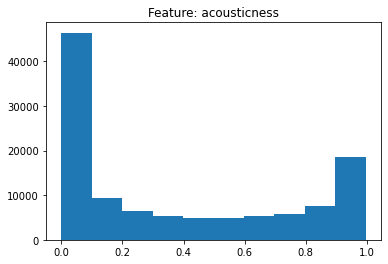

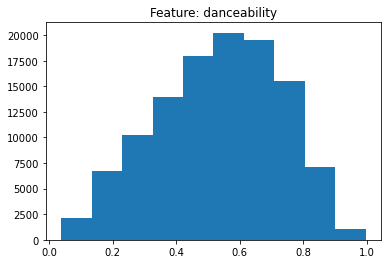

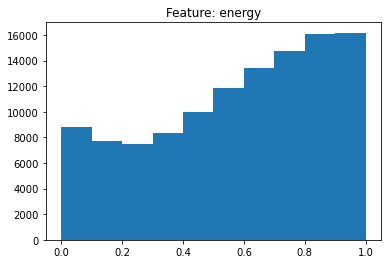

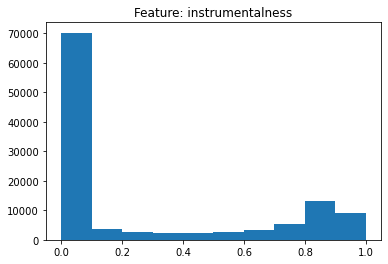

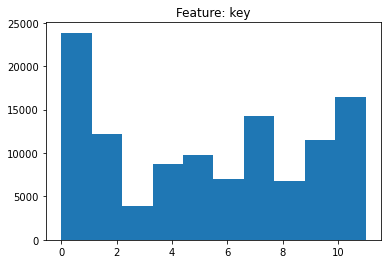

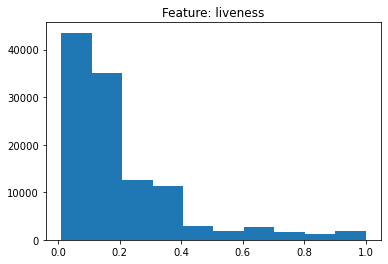

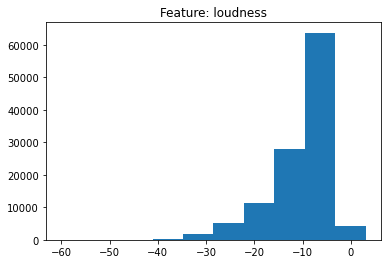

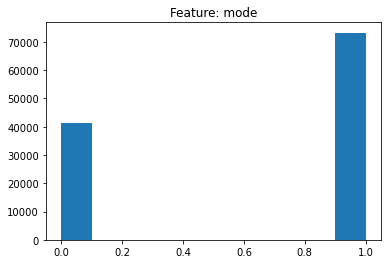

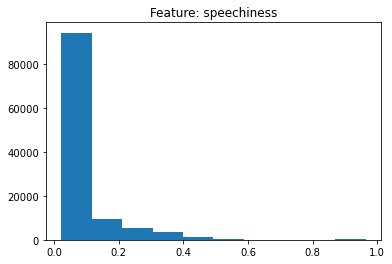

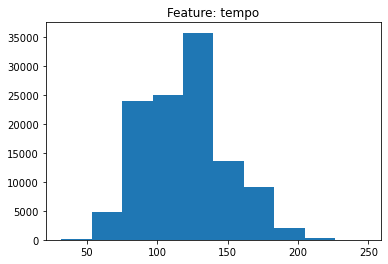

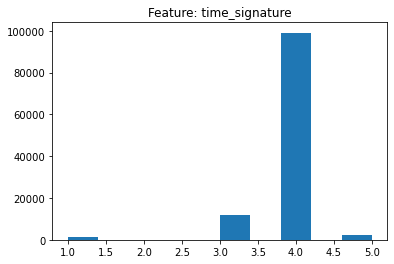

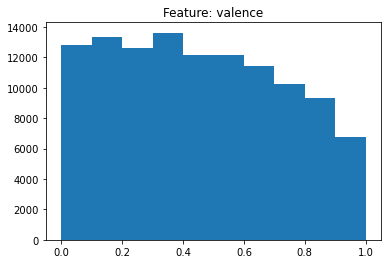

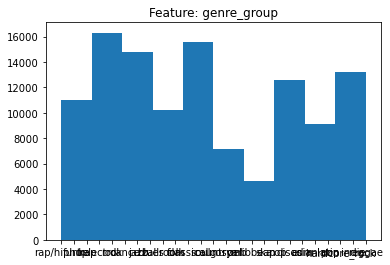

In [50]:
# plot histograms for each feature
for col in tracks_genres_df:
    plt.figure()
    plt.title(f'Feature: {col}')
    plt.hist(tracks_genres_df[col])
    plt.show()

**The feature histograms look wider than the first pass datasets histograms - this supports the choice of this new dataset with more diverse genres and therefore wider distributions of each feature.**

We now have a dataset of a good size (114,512 datapoints/songs) across 25 genres that are conceptually diverse. Let's now look at song attribute/ feature profiles across each genre to see if they look diverse 'on paper'.

### 4.4 Feature Distributions across Genres - Further Cleaning <a id="4.4"></a>

Let's have a look at how our genres differ in terms of features and whether we can combine some similar genres such as blues, soul and rnb. We should definitely combine reggae and caribbean, and also disco and dance.

Let's look at where this is possible.

We will first scale the data so that the distribution graphs are easier to interpret - we'll use a MinMax Scaler so we are comparing all features on the same scale of 0-1.

In [51]:
# reminder of classes and class representation
tracks_genres_df['genre_group'].value_counts()

classical        14335
rock             11614
jazz              7082
indie             6767
rap/hiphop        6748
folk              6696
pop               6239
hardcore_rock     5936
dance             5851
edm               5746
latin             5201
electro           4678
caribbean         4014
asian pop         3900
ballroom          3499
gospel            3301
country           3109
trap              2232
funk              2012
blues             1853
soul              1198
rnb                739
ska                658
disco              611
reggae             493
Name: genre_group, dtype: int64

In [52]:
# instantiate scaler
minmaxscaler = MinMaxScaler()

# apply scaling
# this scaling is for visualisation and EDA use only, not modeling
tracks_genres_df_scaled = minmaxscaler.fit_transform(tracks_genres_df.drop('genre_group', axis=1))

# GET BACK GENRE TAGS
tracks_genres_df_scaled = pd.DataFrame(tracks_genres_df_scaled)
tracks_genres_df_scaled['genre_group'] = tracks_genres_df['genre_group']
tracks_genres_df_scaled

# PUT BACK COLUMN NAMES
old_colnames = list(tracks_genres_df_scaled.columns)
new_colnames= list(tracks_genres_df.columns)
rename_dict = {a:b for a,b in zip(old_colnames,new_colnames)}
tracks_genres_df_scaled.rename(columns=rename_dict, inplace=True)
tracks_genres_df_scaled

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_group
0,0.533133,0.607598,0.759995,0.000000,0.181818,0.124545,0.813393,1.0,0.696294,0.693276,0.75,0.720,rap/hiphop
1,0.134538,0.718222,0.869997,0.000000,0.545455,0.236757,0.913563,1.0,0.345864,0.280234,0.75,0.930,rap/hiphop
2,0.117470,0.793363,0.830997,0.000000,0.545455,0.690659,0.908663,1.0,0.342678,0.265594,0.75,0.885,rap/hiphop
3,0.175703,0.761010,0.838997,0.000010,0.636364,0.365144,0.848501,1.0,0.352235,0.277953,0.75,0.528,NaN
4,0.508032,0.730745,0.791996,0.000000,0.909091,0.088152,0.873840,0.0,0.229054,0.629961,0.75,0.668,rap/hiphop
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114507,0.563253,0.756836,0.377987,0.000000,0.454545,0.110392,0.758749,1.0,0.114368,0.452184,0.75,0.835,classical
114508,0.096888,0.661866,0.630993,0.000001,0.454545,0.127578,0.821385,1.0,0.006584,0.352230,0.75,0.582,classical
114509,0.732932,0.660822,0.503990,0.949950,0.454545,0.092196,0.768628,0.0,0.009451,0.269373,0.75,0.883,classical
114510,0.084036,0.668128,0.873997,0.006847,0.000000,0.229681,0.879470,1.0,0.004991,0.417802,0.75,0.482,classical


We shouldn't be getting 'NaN' values in our genre_group column, let's investigate:

In [53]:
# look at index, something funny ahs happened when putting the genre tags back in the codeblock above
tracks_genres_df.index

Int64Index([      0,       1,       2,       4,      24,      25,     105,
                107,     113,     115,
            ...
            1089641, 1089642, 1089643, 1089644, 1089645, 1089646, 1089657,
            1089658, 1089659, 1089802],
           dtype='int64', length=114512)

Our index needs to be reset before rejoining the genre tags to the scaled dataset:

In [54]:
# fix and double check the index
tracks_genres_df.reset_index(drop=True, inplace=True)
tracks_genres_df['genre_group']

0         rap/hiphop
1         rap/hiphop
2         rap/hiphop
3         rap/hiphop
4         rap/hiphop
             ...    
114507          folk
114508           pop
114509           pop
114510           pop
114511         indie
Name: genre_group, Length: 114512, dtype: object

In [55]:
# redo the scaled dataframe
# scaling
minmaxscaler = MinMaxScaler()

tracks_genres_df_scaled = minmaxscaler.fit_transform(tracks_genres_df.drop('genre_group', axis=1))

# GET BACK GENRE TAGS
tracks_genres_df_scaled = pd.DataFrame(tracks_genres_df_scaled)
tracks_genres_df_scaled['genre_group'] = tracks_genres_df['genre_group']
tracks_genres_df_scaled

# PUT BACK COLUMN NAMES
old_colnames = list(tracks_genres_df_scaled.columns)
new_colnames= list(tracks_genres_df.columns)
rename_dict = {a:b for a,b in zip(old_colnames,new_colnames)}
tracks_genres_df_scaled.rename(columns=rename_dict, inplace=True)
tracks_genres_df_scaled

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_group
0,0.533133,0.607598,0.759995,0.000000,0.181818,0.124545,0.813393,1.0,0.696294,0.693276,0.75,0.720,rap/hiphop
1,0.134538,0.718222,0.869997,0.000000,0.545455,0.236757,0.913563,1.0,0.345864,0.280234,0.75,0.930,rap/hiphop
2,0.117470,0.793363,0.830997,0.000000,0.545455,0.690659,0.908663,1.0,0.342678,0.265594,0.75,0.885,rap/hiphop
3,0.175703,0.761010,0.838997,0.000010,0.636364,0.365144,0.848501,1.0,0.352235,0.277953,0.75,0.528,rap/hiphop
4,0.508032,0.730745,0.791996,0.000000,0.909091,0.088152,0.873840,0.0,0.229054,0.629961,0.75,0.668,rap/hiphop
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114507,0.563253,0.756836,0.377987,0.000000,0.454545,0.110392,0.758749,1.0,0.114368,0.452184,0.75,0.835,folk
114508,0.096888,0.661866,0.630993,0.000001,0.454545,0.127578,0.821385,1.0,0.006584,0.352230,0.75,0.582,pop
114509,0.732932,0.660822,0.503990,0.949950,0.454545,0.092196,0.768628,0.0,0.009451,0.269373,0.75,0.883,pop
114510,0.084036,0.668128,0.873997,0.006847,0.000000,0.229681,0.879470,1.0,0.004991,0.417802,0.75,0.482,pop


In [56]:
# check features columns
tracks_genres_df_scaled.describe()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,114512.000000,114512.000000,114512.000000,114512.000000,114512.000000,114512.000000,114512.000000,114512.000000,114512.000000,114512.000000,114512.000000,114512.000000
mean,0.373521,0.516327,0.578737,0.269576,0.478706,0.200259,0.789328,0.639409,0.067904,0.405656,0.720839,0.455806
std,0.374970,0.202453,0.284852,0.368580,0.322634,0.191553,0.099763,0.480174,0.104236,0.135529,0.113067,0.272602
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.014558,0.370695,0.358987,0.000002,0.181818,0.084513,0.750519,0.000000,0.015291,0.298402,0.750000,0.219000
50%,0.219880,0.530369,0.626992,0.004645,0.454545,0.118480,0.819268,1.000000,0.027503,0.408070,0.750000,0.440000
75%,0.759036,0.673346,0.823996,0.672923,0.727273,0.257986,0.858015,1.000000,0.065759,0.482778,0.750000,0.680000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# calculate mean by feature for each genre for our genre profiles
feature_means_genre = tracks_genres_df_scaled.groupby(by=tracks_genres_df_scaled['genre_group'], axis=0).mean()
feature_means_genre

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
genre_group,,,,,,,,,,,,
asian pop,0.383327,0.554247,0.597102,0.035228,0.483473,0.187517,0.836285,0.705385,0.036755,0.419594,0.732244,0.456207
ballroom,0.624971,0.564528,0.541013,0.253586,0.464990,0.196038,0.790827,0.618462,0.044617,0.388469,0.723993,0.671880
blues,0.492743,0.572927,0.537202,0.129755,0.479370,0.217281,0.794673,0.699406,0.047361,0.413993,0.702644,0.645137
caribbean,0.203526,0.682961,0.698478,0.052649,0.494293,0.202897,0.841456,0.567265,0.154920,0.402377,0.753986,0.689540
classical,0.931975,0.270293,0.136714,0.606373,0.446847,0.147416,0.605548,0.689920,0.028118,0.331189,0.674974,0.214590
country,0.364323,0.548728,0.570655,0.035714,0.457850,0.215986,0.814902,0.895465,0.032940,0.410227,0.722097,0.544733
dance,0.075627,0.716572,0.728789,0.502806,0.509905,0.155713,0.820084,0.518886,0.061754,0.429772,0.745172,0.484772
disco,0.095099,0.696244,0.717515,0.353146,0.508853,0.147305,0.810919,0.509002,0.039390,0.413769,0.746318,0.651844
edm,0.044099,0.618917,0.801774,0.566468,0.508844,0.221203,0.833773,0.504699,0.058301,0.461322,0.743865,0.319004


All of the features have been scaled to fit between 0 and 1, let's look at the range of each to see how each feature contributes to genre profiles (initial view of feature importance):

In [58]:
min_max_df = feature_means_genre.agg(['min', 'max'], axis=0).T
min_max_df['feature_range'] = min_max_df['max'] - min_max_df['min']
min_max_df

,min,max,feature_range
acousticness,0.044099,0.931975,0.887876
danceability,0.270293,0.716572,0.446280
energy,0.136714,0.836327,0.699613
instrumentalness,0.024177,0.606373,0.582196
key,0.446847,0.524040,0.077193
liveness,0.147305,0.268637,0.121332
loudness,0.605548,0.851294,0.245746
mode,0.504699,0.895465,0.390766
speechiness,0.028118,0.231152,0.203034
tempo,0.331189,0.496106,0.164917


**Key and time_signature have below 0.1 of variability - they barely seem to differ across genres.**

**In the next notebook we will look at dropping from the dataset as part of preprocessing feature selection.**

In [59]:
# create lists for genres we want to compare
list1 = ['blues','soul', 'rnb']
list2 = ['reggae', 'caribbean', 'ska', 'latin']
list3 = ['disco', 'dance', 'edm', 'electro']
list4 = ['trap', 'rap/hiphop']
list5 = ['pop', 'asian pop']
list6 = ['classical', 'rock'] # this is to compare totally different genres to see how they compare graphically

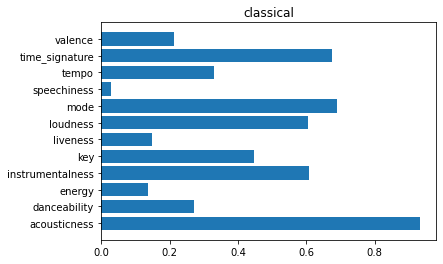

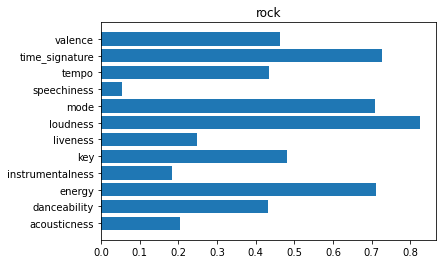

In [60]:
# create bar chart by attribute for conceptually 'opposite' genres
for item in list6:
    plt.title(item)
    index_no = feature_means_genre.T.columns.get_loc(item)
    plt.barh(feature_means_genre.T.index, feature_means_genre.T.iloc[:,index_no])
    plt.show()

One can see how different in profile classical is from rock.

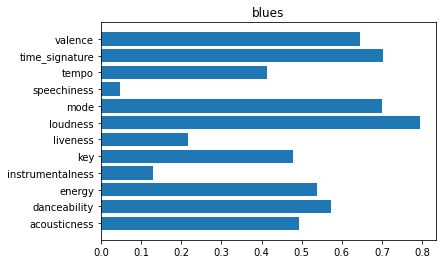

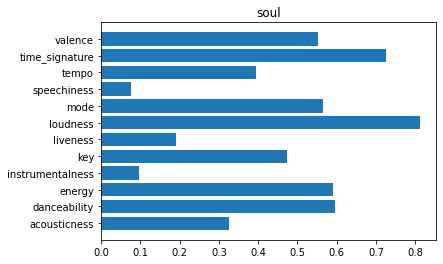

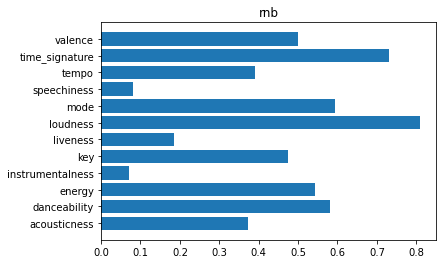

In [61]:
# create bar chart by attribute for list1: blues, soul, rnb
for item in list1:
    plt.title(item)
    index_no = feature_means_genre.T.columns.get_loc(item)
    plt.barh(feature_means_genre.T.index, feature_means_genre.T.iloc[:,index_no])
    plt.show()

Soul and RnB share very similar profiles, varying only slightly in valence and energy, but barely perceptibly, with nearly identical shapes.

Blues differs from the two considerably in valence, mode, energy and acousticiness.

We will combine soul and rnb, but not blues.

In [62]:
# combine soul and rnb
tracks_genres_df_scaled = tracks_genres_df_scaled.replace(to_replace={'soul':'rnb'})
tracks_genres_df_scaled['genre_group'].value_counts()

classical        14335
rock             11614
jazz              7082
indie             6767
rap/hiphop        6748
folk              6696
pop               6239
hardcore_rock     5936
dance             5851
edm               5746
latin             5201
electro           4678
caribbean         4014
asian pop         3900
ballroom          3499
gospel            3301
country           3109
trap              2232
funk              2012
rnb               1937
blues             1853
ska                658
disco              611
reggae             493
Name: genre_group, dtype: int64

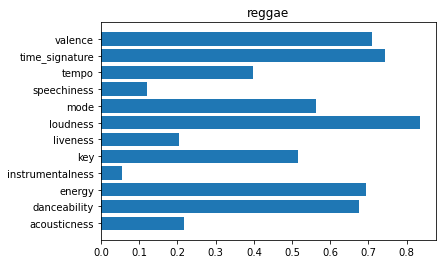

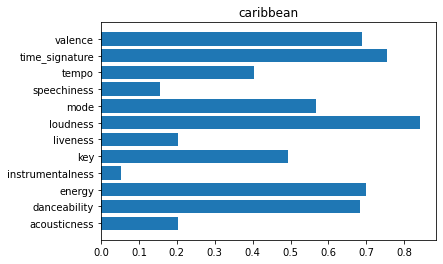

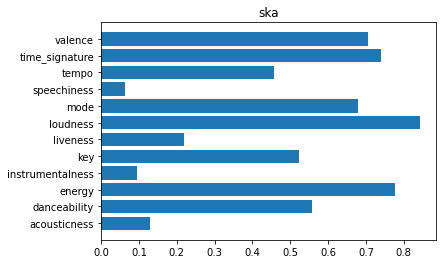

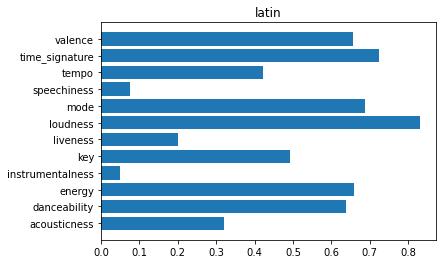

In [63]:
# create bar chart by attribute for list2: reggae, caribbean, ska, latin
for item in list2:
    plt.title(item)
    index_no = feature_means_genre.T.columns.get_loc(item)
    plt.barh(feature_means_genre.T.index, feature_means_genre.T.iloc[:,index_no])
    plt.show()

These 4 share very close overall profiles, the key difference being that ska has higher energy and lower danceability and acousticness.

We will combine them into one class: latino/caribbean.

In [64]:
# combine reggae, caribbean ska and latin into latino/caribbean
tracks_genres_df_scaled = tracks_genres_df_scaled.replace\
                            (to_replace={'reggae':'latino/caribbean', 'ska':'latino/caribbean', 'latin':'latino/caribbean',\
                                         'caribbean':'latino/caribbean'})
tracks_genres_df_scaled['genre_group'].value_counts()

classical           14335
rock                11614
latino/caribbean    10366
jazz                 7082
indie                6767
rap/hiphop           6748
folk                 6696
pop                  6239
hardcore_rock        5936
dance                5851
edm                  5746
electro              4678
asian pop            3900
ballroom             3499
gospel               3301
country              3109
trap                 2232
funk                 2012
rnb                  1937
blues                1853
disco                 611
Name: genre_group, dtype: int64

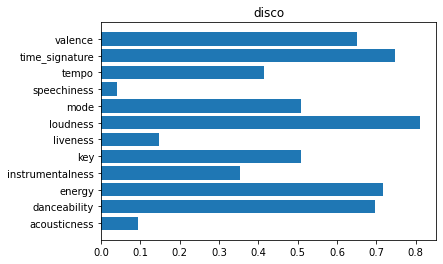

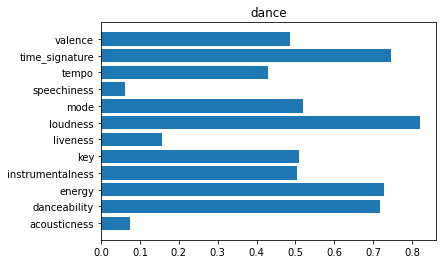

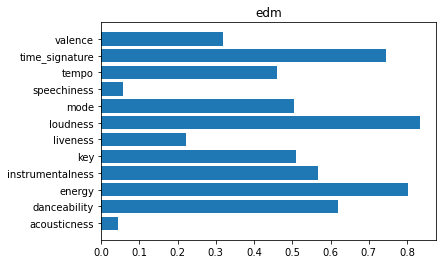

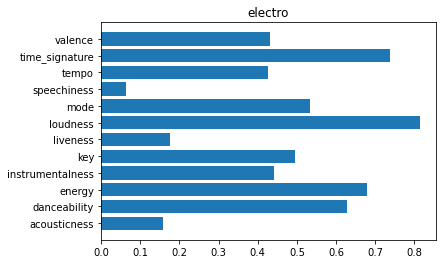

In [65]:
# create bar chart by attribute for disco, dance, edm and electro
for item in list3:
    plt.title(item)
    index_no = feature_means_genre.T.columns.get_loc(item)
    plt.barh(feature_means_genre.T.index, feature_means_genre.T.iloc[:,index_no])
    plt.show()

The four share very similar profiles, differing mainly in valence.
Disco differs from the other three in terms of instrumentalness. 
EDM and Electro differ from the other two in terms of danceability.

We will combine them as they are nonetheless very similar profiles. Disco representation is so small compared to dance and edm, that the class mean change after it is combined should not be hugely impacted.

In [66]:
# combine disco, dance and electro into edm
tracks_genres_df_scaled = tracks_genres_df_scaled.replace(to_replace={'disco':'edm', 'dance':'edm', 'electro':'edm'})
tracks_genres_df_scaled['genre_group'].value_counts()

edm                 16886
classical           14335
rock                11614
latino/caribbean    10366
jazz                 7082
indie                6767
rap/hiphop           6748
folk                 6696
pop                  6239
hardcore_rock        5936
asian pop            3900
ballroom             3499
gospel               3301
country              3109
trap                 2232
funk                 2012
rnb                  1937
blues                1853
Name: genre_group, dtype: int64

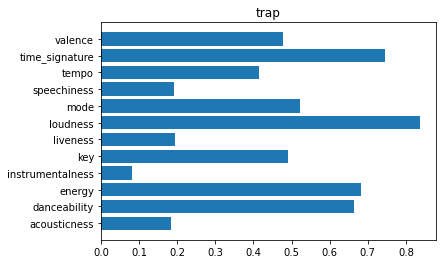

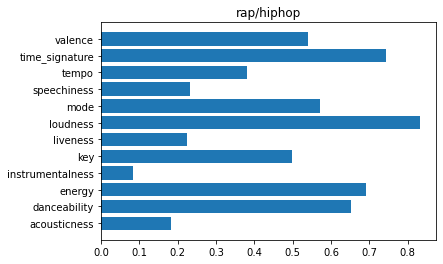

In [67]:
# create bar chart by attribute for trap and rap/hiphop
for item in list4:
    plt.title(item)
    index_no = feature_means_genre.T.columns.get_loc(item)
    plt.barh(feature_means_genre.T.index, feature_means_genre.T.iloc[:,index_no])
    plt.show()

Apart from very slight differences in valence and tempo they are otherwise very very similar, so we'll combine them.

In [68]:
# combine trap and rap/hiphop
tracks_genres_df_scaled = tracks_genres_df_scaled.replace(to_replace={'trap':'rap/hiphop'})
tracks_genres_df_scaled['genre_group'].value_counts()

edm                 16886
classical           14335
rock                11614
latino/caribbean    10366
rap/hiphop           8980
jazz                 7082
indie                6767
folk                 6696
pop                  6239
hardcore_rock        5936
asian pop            3900
ballroom             3499
gospel               3301
country              3109
funk                 2012
rnb                  1937
blues                1853
Name: genre_group, dtype: int64

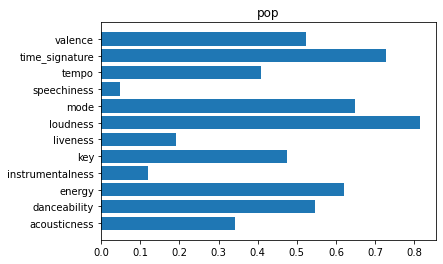

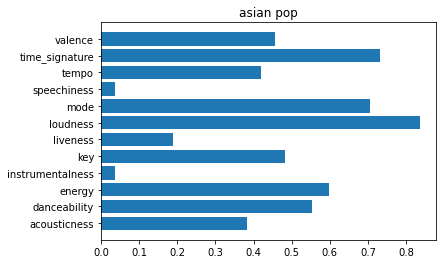

In [69]:
# compare pop and asian pop
for item in list5:
    plt.title(item)
    index_no = feature_means_genre.T.columns.get_loc(item)
    plt.barh(feature_means_genre.T.index, feature_means_genre.T.iloc[:,index_no])
    plt.show()

Apart from very slight differences in valence, tempo and mode they are otherwise very very similar, so we'll combine them.

In [70]:
# combine pop and asian pop
tracks_genres_df_scaled = tracks_genres_df_scaled.replace(to_replace={'asian pop':'pop'})
tracks_genres_df_scaled['genre_group'].value_counts()

edm                 16886
classical           14335
rock                11614
latino/caribbean    10366
pop                 10139
rap/hiphop           8980
jazz                 7082
indie                6767
folk                 6696
hardcore_rock        5936
ballroom             3499
gospel               3301
country              3109
funk                 2012
rnb                  1937
blues                1853
Name: genre_group, dtype: int64

In [71]:
# look at the final class representation
tracks_genres_df_scaled['genre_group'].value_counts()

edm                 16886
classical           14335
rock                11614
latino/caribbean    10366
pop                 10139
rap/hiphop           8980
jazz                 7082
indie                6767
folk                 6696
hardcore_rock        5936
ballroom             3499
gospel               3301
country              3109
funk                 2012
rnb                  1937
blues                1853
Name: genre_group, dtype: int64

We now have 16 diverse genres that make sense as separate classes. Let's apply these transformations to our unscaled dataset:

In [72]:
# apply the genre cleaning to the unscaled dataset
tracks_genres_df.replace(to_replace={'soul':'rnb'}, inplace=True)
tracks_genres_df.replace(to_replace={'reggae':'latino/caribbean', 'ska':'latino/caribbean', 'latin':'latino/caribbean',\
                                     'caribbean':'latino/caribbean'}, inplace=True)
tracks_genres_df.replace(to_replace={'disco':'edm', 'dance':'edm', 'electro':'edm'}, inplace=True)
tracks_genres_df.replace(to_replace={'trap':'rap/hiphop'}, inplace=True)
tracks_genres_df.replace(to_replace={'asian pop':'pop'}, inplace=True)

C:\Users\smgar\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [73]:
# look at classes in unscaled dataset
tracks_genres_df['genre_group'].value_counts()

edm                 16886
classical           14335
rock                11614
latino/caribbean    10366
pop                 10139
rap/hiphop           8980
jazz                 7082
indie                6767
folk                 6696
hardcore_rock        5936
ballroom             3499
gospel               3301
country              3109
funk                 2012
rnb                  1937
blues                1853
Name: genre_group, dtype: int64

### 5. Export to CSV  <a id="5"></a>

In [74]:
# export to csv
# we'll export both, we want unscaled data for our modelling as we will scale within pipelines
tracks_genres_df_scaled.to_csv('../data/tracks_genres_df_scaled.csv')
tracks_genres_df.to_csv('../data/tracks_genres_df_notscaled.csv')